<a href="https://colab.research.google.com/github/SergiyDovgopolyk/Data_Science/blob/main/HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical
from keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

4422102/4422102 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


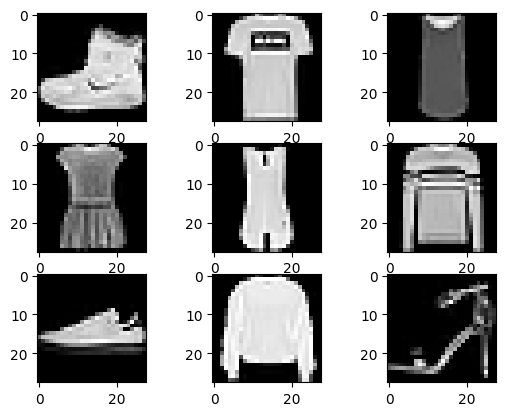

In [3]:
for i in range(9):
 plt.subplot(330 + 1 + i)
 # plot raw pixel data
 plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# Build a simple neural network
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/50
6000/6000 [==============================] - 27s 4ms/step - loss: 0.0897 - accuracy: 0.8170 - val_loss: 0.0778 - val_accuracy: 0.8380
Epoch 2/50
6000/6000 [==============================] - 19s 3ms/step - loss: 0.0671 - accuracy: 0.8639 - val_loss: 0.0652 - val_accuracy: 0.8673
Epoch 3/50
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0610 - accuracy: 0.8751 - val_loss: 0.0645 - val_accuracy: 0.8725
Epoch 4/50
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0572 - accuracy: 0.8830 - val_loss: 0.0651 - val_accuracy: 0.8720
Epoch 5/50
6000/6000 [==============================] - 20s 3ms/step - loss: 0.0542 - accuracy: 0.8900 - val_loss: 0.0635 - val_accuracy: 0.8706
Epoch 6/50
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0517 - accuracy: 0.8942 - val_loss: 0.0647 - val_accuracy: 0.8773
Epoch 7/50
6000/6000 [==============================] - 21s 4ms/step - loss: 0.0498 - accuracy: 0.8977 - val_loss: 0.0708 - val_ac

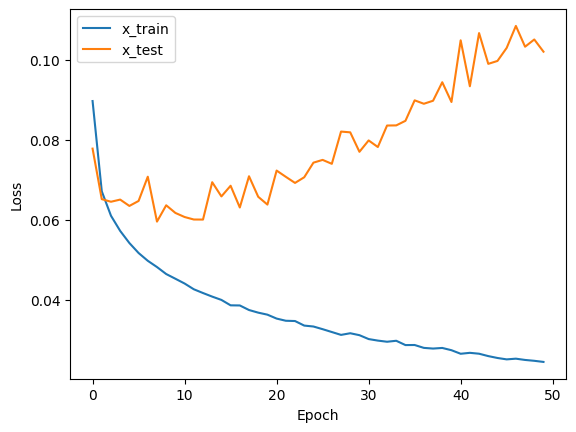

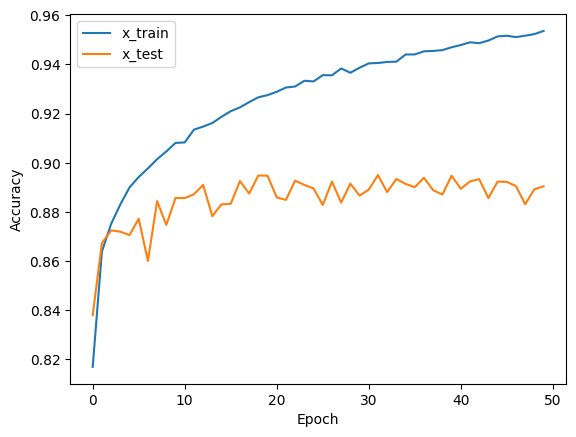

In [6]:
plt.plot(history.history['loss'], label='x_train')
plt.plot(history.history['val_loss'], label='x_test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='x_train')
plt.plot(history.history['val_accuracy'], label='x_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Точність на тесті: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.1128 - accuracy: 0.8834
Точність на тесті: 88.34%


In [8]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
!rm -rf ./logs/
# Build a simple neural network
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))  # Add dropout layer
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Configure the checkpointing
early_stopping = EarlyStopping(patience=2, monitor='val_accuracy')
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
tensorboard = TensorBoard(log_dir='./logs')

callback_list = [
    early_stopping,
    model_checkpoint,
    tensorboard
]

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0995 - accuracy: 0.7993 - val_loss: 0.0759 - val_accuracy: 0.8431
Epoch 2/50
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0742 - accuracy: 0.8487 - val_loss: 0.0659 - val_accuracy: 0.8632
Epoch 3/50
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0674 - accuracy: 0.8613 - val_loss: 0.0661 - val_accuracy: 0.8602
Epoch 4/50
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0642 - accuracy: 0.8676 - val_loss: 0.0648 - val_accuracy: 0.8723
Epoch 5/50
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0616 - accuracy: 0.8742 - val_loss: 0.0629 - val_accuracy: 0.8714
Epoch 6/50
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0594 - accuracy: 0.8785 - val_loss: 0.0613 - val_accuracy: 0.8788
Epoch 7/50
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0578 - accuracy: 0.8818 - val_loss: 0.0592 - val_ac

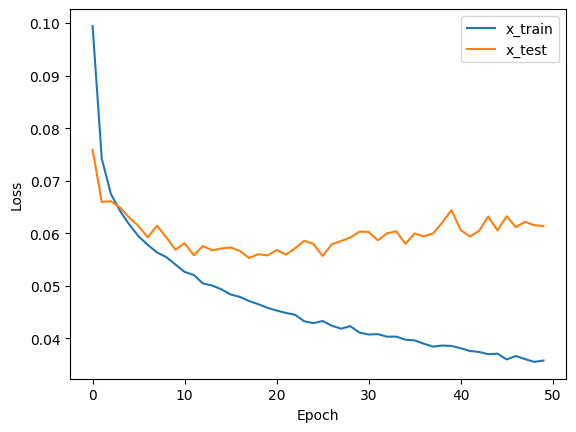

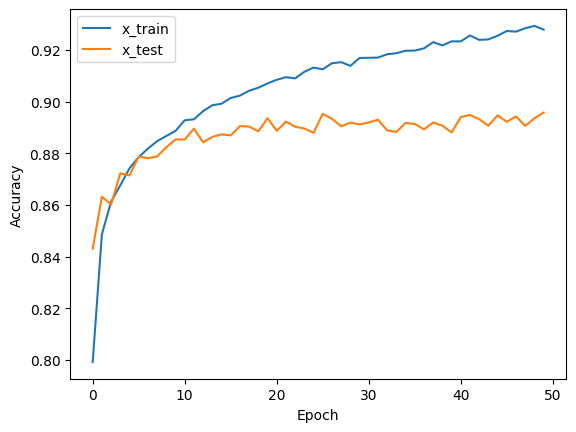

In [9]:
plt.plot(history.history['loss'], label='x_train')
plt.plot(history.history['val_loss'], label='x_test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='x_train')
plt.plot(history.history['val_accuracy'], label='x_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Точність на тесті: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.0683 - accuracy: 0.8898
Точність на тесті: 88.98%


In [11]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='softmax'))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Configure the checkpointing
early_stopping = EarlyStopping(patience=2, monitor='val_accuracy')
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
tensorboard = TensorBoard(log_dir='./logs')

callback_list = [
    early_stopping,
    model_checkpoint,
    tensorboard
]

# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=8, validation_split=0.2, verbose=1)

Epoch 1/30
6000/6000 [==============================] - 22s 4ms/step - loss: 0.4407 - accuracy: 0.0945 - val_loss: 0.3397 - val_accuracy: 0.0992
Epoch 2/30
6000/6000 [==============================] - 19s 3ms/step - loss: 0.3302 - accuracy: 0.1033 - val_loss: 0.3262 - val_accuracy: 0.1042
Epoch 3/30
6000/6000 [==============================] - 20s 3ms/step - loss: 0.3255 - accuracy: 0.1076 - val_loss: 0.3252 - val_accuracy: 0.1065
Epoch 4/30
6000/6000 [==============================] - 22s 4ms/step - loss: 0.3251 - accuracy: 0.1123 - val_loss: 0.3250 - val_accuracy: 0.1103
Epoch 5/30
6000/6000 [==============================] - 20s 3ms/step - loss: 0.3250 - accuracy: 0.1112 - val_loss: 0.3250 - val_accuracy: 0.1108
Epoch 6/30
6000/6000 [==============================] - 21s 4ms/step - loss: 0.3250 - accuracy: 0.1146 - val_loss: 0.3250 - val_accuracy: 0.1178
Epoch 7/30
6000/6000 [==============================] - 20s 3ms/step - loss: 0.3250 - accuracy: 0.1171 - val_loss: 0.3249 - val_ac

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Точність на тесті: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.2797
Точність на тесті: 27.97%


In [13]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
3000/3000 [==============================] - 12s 4ms/step - loss: 0.5114 - accuracy: 0.8157 - val_loss: 0.4370 - val_accuracy: 0.8467
Epoch 2/50
3000/3000 [==============================] - 10s 3ms/step - loss: 0.4062 - accuracy: 0.8562 - val_loss: 0.4164 - val_accuracy: 0.8553
Epoch 3/50
3000/3000 [==============================] - 10s 3ms/step - loss: 0.3931 - accuracy: 0.8661 - val_loss: 0.4447 - val_accuracy: 0.8505
Epoch 4/50
3000/3000 [==============================] - 10s 3ms/step - loss: 0.3848 - accuracy: 0.8711 - val_loss: 0.4052 - val_accuracy: 0.8668
Epoch 5/50
3000/3000 [==============================] - 10s 3ms/step - loss: 0.3785 - accuracy: 0.8756 - val_loss: 0.4239 - val_accuracy: 0.8714
Epoch 6/50
3000/3000 [==============================] - 10s 3ms/step - loss: 0.3749 - accuracy: 0.8770 - val_loss: 0.4028 - val_accuracy: 0.8720
Epoch 7/50
3000/3000 [==============================] - 10s 3ms/step - loss: 0.3694 - accuracy: 0.8785 - val_loss: 0.4590 - val_ac

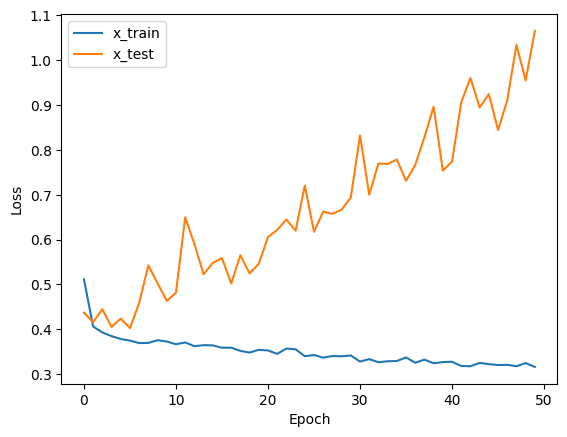

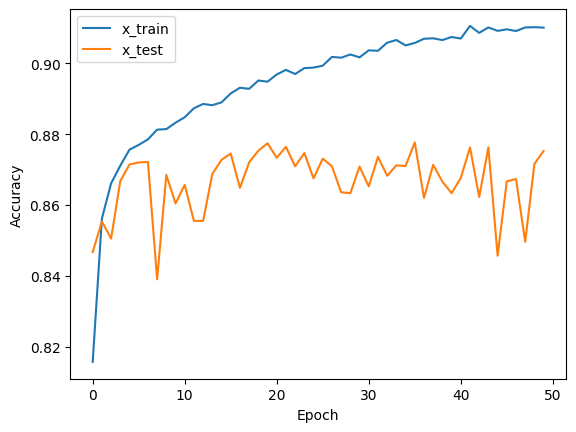

In [14]:
plt.plot(history.history['loss'], label='x_train')
plt.plot(history.history['val_loss'], label='x_test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='x_train')
plt.plot(history.history['val_accuracy'], label='x_test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Точність на тесті: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 1.0950 - accuracy: 0.8717
Точність на тесті: 87.17%
